In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_data_df = pd.merge(city_data_df, ride_data_df, how='outer', on='city')

# Display the data table for preview
combined_data_df.head(10)


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

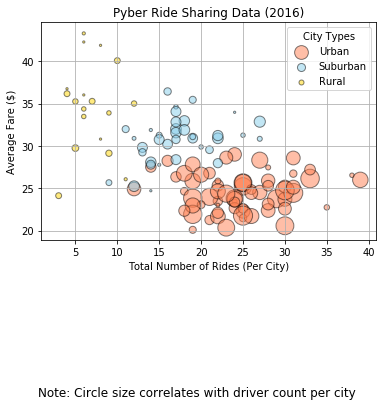

In [59]:
# Obtain the x and y coordinates for each of the three city types
urban_df = combined_data_df.loc[combined_data_df['type']=='Urban']
suburban_df = combined_data_df.loc[combined_data_df['type']=='Suburban']
rural_df = combined_data_df.loc[combined_data_df['type']=='Rural']

urban_fare_mean_df = urban_df.groupby(['city', 'driver_count']).mean().reset_index()
urban_fare_mean_df.drop('ride_id', axis=1, inplace=True)
suburban_fare_mean_df = suburban_df.groupby(['city', 'driver_count']).mean().reset_index()
suburban_fare_mean_df.drop('ride_id', axis=1, inplace=True)
rural_fare_mean_df = rural_df.groupby(['city', 'driver_count']).mean().reset_index()
rural_fare_mean_df.drop('ride_id', axis=1, inplace=True)

urban_count = urban_df.groupby('city').city.count()
suburban_count = suburban_df.groupby('city').city.count()
rural_count = rural_df.groupby('city').city.count()
urban_count_df = pd.DataFrame(data=urban_count)
suburban_count_df = pd.DataFrame(data=suburban_count)
rural_count_df = pd.DataFrame(data=rural_count)
urban_count_df.rename(columns={'city':'total_rides'}, inplace=True)
suburban_count_df.rename(columns={'city':'total_rides'}, inplace=True)
rural_count_df.rename(columns={'city':'total_rides'}, inplace=True)

urban_data_df = pd.merge(urban_fare_mean_df, urban_count_df, how='outer', on='city')
suburban_data_df = pd.merge(suburban_fare_mean_df, suburban_count_df, how='outer', on='city')
rural_data_df = pd.merge(rural_fare_mean_df, rural_count_df, how='outer', on='city')

urban_x = urban_data_df['total_rides']
urban_y = urban_data_df['fare']
urban_size = urban_data_df['driver_count']
suburban_x = suburban_data_df['total_rides']
suburban_y = suburban_data_df['fare']
suburban_size = suburban_data_df['driver_count']
rural_x = rural_data_df['total_rides']
rural_y = rural_data_df['fare']
rural_size = rural_data_df['driver_count']
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, marker="o", facecolors="coral", s=urban_size * 5, edgecolors="black", alpha = 0.5, label="Urban")
plt.scatter(suburban_x, suburban_y, marker="o", facecolors="skyblue", s=suburban_size * 5, edgecolors="black", alpha = 0.5, label="Suburban")
plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", s=rural_size * 5, edgecolors="black", alpha = 0.5, label="Rural")
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title="City Types", loc="best")
plt.text(0.5, 0.5, 'Note: Circle size correlates with driver count per city', fontsize=12)
# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/avg_state_rain.png")
# Show plot
plt.show()

## Total Fares by City Type

In [75]:
# Calculate Type Percents
total_fare_df = combined_data_df.groupby(['type']).sum()
total_fare_df.drop('ride_id', axis=1, inplace=True)
total_fare_df.drop('driver_count', axis=1, inplace=True)
fare_total = total_fare_df['fare'].sum()

# Build Pie Chart
types = ["Urban", "Suburban", "Rural"]
percents = []
# Save Figure


IndexError: index 2 is out of bounds for axis 0 with size 1

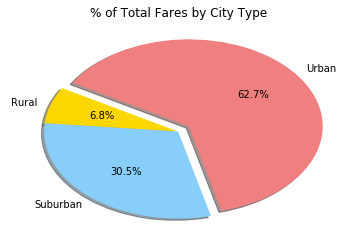

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


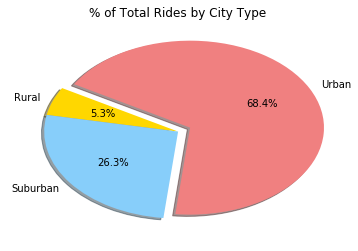

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


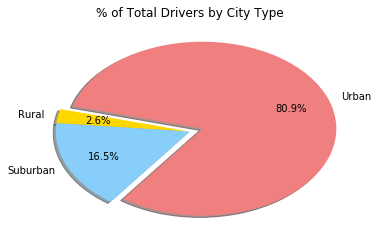

In [6]:
# Show Figure
plt.show()